In [2]:
# librerias analytics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# librerias db
import boto3
import psycopg2
import pymysql
import configparser

# librerias para generar datos
import random
from faker import Faker
from datetime import datetime

# referencias de archivos
import constants as cons
import ddl

# CONN con RDS

In [3]:
config = configparser.ConfigParser()
config.read(cons.CONFIG_FILE)

['config.cfg']

In [4]:
rds_conn = boto3.client(
    'rds',
    aws_access_key_id=config.get(cons.USER, cons.ACCESS_KEY),
    aws_secret_access_key=config.get(cons.USER, cons.SECRET_KEY),
    region_name='us-east-1'
)

In [5]:
rds_instances_ids = []
aws_response = rds_conn.describe_db_instances()

for db_instance in aws_response['DBInstances']:
    db_instance_identifier = db_instance['DBInstanceIdentifier']
    db_engine = db_instance['Engine']
    if (db_engine == 'mysql'):
      aws_mysql = db_instance
    else:
      aws_postgres = db_instance
    print(f"La instancia '{db_instance_identifier}' utiliza el motor de base de datos '{db_engine}'")

La instancia 'ja3plqub98cr' utiliza el motor de base de datos 'mysql'
La instancia 'xux3br0jo1lp' utiliza el motor de base de datos 'postgres'


In [6]:
try:
    instance = rds_conn.describe_db_instances(
        DBInstanceIdentifier=config.get(cons.DB, cons.INSTANCE_ID)
    )
    RDS_HOSTNAME = instance.get('DBInstances')[0].get('Endpoint').get('Address')
    print(RDS_HOSTNAME)
except Exception as ex:
    print("Error!! ", ex)

xux3br0jo1lp.cr0suguo232c.us-east-1.rds.amazonaws.com


In [7]:
pg_conn = psycopg2.connect(
    dbname=config.get(cons.DB, cons.DB_NAME), 
    user=config.get(cons.DB, cons.DB_USERNAME),
    password=config.get(cons.DB, cons.DB_PASSWORD),
    port=int(config.get('DB', 'DB_PORT')),
    host=RDS_HOSTNAME
)

In [87]:
pg_conn.close()

# Preguntas de Negocio

In [8]:
def get_data(conn, query):
    cursor = conn.cursor()
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        col_names = [desc[0] for desc in cursor.description]
        df = pd.DataFrame(result, columns=col_names)
        return df
    except Exception as e:
        print(f"Error: {e}")
        return pd.DataFrame()
    finally:
        cursor.close()

In [9]:
query_prueba = "SELECT * from dimVenta;"
query_prueba2 = "SELECT * from dimArticulo;"
query_prueba3 = "SELECT * from dimFechas;"
query_prueba4 = "SELECT * from dimPersona;"

In [10]:
datos = get_data(pg_conn, query_prueba)
datos

,idventa,idpersona,nombrecliente,idarticulo,cantidad,precio,descuento,fecha,total,campo_timestamp
0,996,558,John Montgomery,112,5,460.26,111.01,2022-02-24,8675.19,2024-04-15 01:53:38.843146
1,720,532,Justin Martinez,255,2,101.38,8.74,2022-06-17,6339.01,2024-04-15 01:53:38.843146
2,564,360,Trevor Wolfe,138,10,179.30,11.66,2021-10-29,1090.73,2024-04-15 01:53:38.843146
3,999,435,Robert Byrd,120,10,182.21,40.05,2020-04-06,3560.54,2024-04-15 01:53:38.843146
4,219,126,Timothy Padilla,18,3,406.11,66.30,2022-11-01,3193.13,2024-04-15 01:53:38.843146
...,...,...,...,...,...,...,...,...,...,...
295,112,460,Sara Saunders,158,10,478.90,67.61,2021-06-24,3870.43,2024-04-15 01:53:38.843146
296,763,428,Amanda Peters,168,7,61.31,14.01,2022-08-07,1847.21,2024-04-15 01:53:38.843146
297,738,122,Mrs. Patricia Gray,34,7,381.13,36.09,2023-01-12,1390.83,2024-04-15 01:53:38.843146
298,947,326,Matthew Weiss,252,5,32.40,6.46,2020-12-22,9380.65,2024-04-15 01:53:38.843146


In [11]:
datos2 = get_data(pg_conn, query_prueba2)
datos2

,idarticulo,categoria,codigo,nombre,precio_venta,campo_timestamp
0,1,Beauty,4572570011404,Operation,489.63,2024-04-15 00:36:31.613732
1,2,Toys,5534368831952,Accept,232.53,2024-04-15 00:36:31.613732
2,3,Garden,5541609645667,Manager,407.86,2024-04-15 00:36:31.613732
3,4,Grocery,4520433978142,Pull,490.89,2024-04-15 00:36:31.613732
4,5,Clothing,5505920218887,Foot,203.91,2024-04-15 00:36:31.613732
...,...,...,...,...,...,...
595,596,Baby,4546456070359,Half,409.39,2024-04-15 00:36:31.613732
596,597,Outdoors,5567416571890,Wife,453.44,2024-04-15 00:36:31.613732
597,598,Garden,4542546722580,Water,452.07,2024-04-15 00:36:31.613732
598,599,Clothing,4547915109887,Save,472.23,2024-04-15 00:36:31.613732


In [12]:
datos3 = get_data(pg_conn, query_prueba3)
datos3

,idfecha,fecha_completa,dia_semana,num_dia_mes,dia_nombre,dia_abrev,semana_bandera,mes,mes_nombre,cuarto,anio,campo_timestamp
0,20200829,2020-08-29,5,29,Saturday,None,None,8,August,3,2020,2024-04-15 03:17:08.585706
1,20201218,2020-08-29,4,18,Friday,None,None,12,December,4,2020,2024-04-15 03:17:08.585706
2,20200114,2020-08-29,1,14,Tuesday,None,None,1,January,1,2020,2024-04-15 03:17:08.585706
3,20210730,2020-08-29,4,30,Friday,None,None,7,July,3,2021,2024-04-15 03:17:08.585706
4,20211221,2020-08-29,1,21,Tuesday,None,None,12,December,4,2021,2024-04-15 03:17:08.585706
...,...,...,...,...,...,...,...,...,...,...,...,...
1081,20221104,2020-08-29,4,4,Friday,None,None,11,November,4,2022,2024-04-15 03:17:08.585706
1082,20221027,2020-08-29,3,27,Thursday,None,None,10,October,4,2022,2024-04-15 03:17:08.585706
1083,20201223,2020-08-29,2,23,Wednesday,None,None,12,December,4,2020,2024-04-15 03:17:08.585706
1084,20211021,2020-08-29,3,21,Thursday,None,None,10,October,4,2021,2024-04-15 03:17:08.585706


In [13]:
datos4 = get_data(pg_conn, query_prueba4)
datos4

,idpersona,nombre,num_documento,email,campo_timestamp
0,1,Kayla West,G38232932,christine21@example.org,2024-04-15 00:40:34.751992
1,2,Tonya Moore,606584966,jonesmichael@example.net,2024-04-15 00:40:34.751992
2,3,Jeremy Adams,M75947940,uclark@example.com,2024-04-15 00:40:34.751992
3,4,Dr. Brian Lynch,W97529359,kayla77@example.net,2024-04-15 00:40:34.751992
4,5,Justin Garcia,D56537443,baileyjustin@example.com,2024-04-15 00:40:34.751992
...,...,...,...,...,...
1795,1796,Amanda Morales,F09748441,jeromemann@example.com,2024-04-15 00:40:34.751992
1796,1797,Dana Randall,9010531938426,barbarafisher@example.com,2024-04-15 00:40:34.751992
1797,1798,Jacqueline Savage,897554926,steven73@example.org,2024-04-15 00:40:34.751992
1798,1799,Todd Higgins,9266539402556,welchjames@example.org,2024-04-15 00:40:34.751992


## 1. Articulos Mas Vendidos

### ¿Cuáles son los artículos más vendidos según distintos períodos de tiempos?

In [14]:
# con tabla hechos
# best_selling_query = """
# SELECT 
#     anio AS year,
#     mes_nombre AS month,
#     nombre,
#     SUM(cantidad) AS cantidad_total
# FROM hechos h
# JOIN dimArticulo dA ON h.idArticulo = dA.idarticulo
# JOIN dimFechas dF ON h.idFecha = dF.idFecha
# GROUP BY year, month, nombre
# ORDER BY year, month, cantidad_total DESC
# LIMIT 5;
# """

best_selling_query = """
SELECT 
    EXTRACT(YEAR FROM dV.fecha) AS year,
    EXTRACT(MONTH FROM dV.fecha) AS month,
    dA.nombre,
    SUM(dV.cantidad) AS cantidad_total
FROM dimVenta dV
JOIN dimArticulo dA ON dV.idarticulo = dA.idarticulo
GROUP BY year, month, dA.nombre
ORDER BY year, month, cantidad_total DESC;
"""

best_selling_df = get_data(pg_conn, best_selling_query)

# con tabla hechos
# worst_selling_query = """
# SELECT 
#     anio AS year,
#     mes_nombre AS month,
#     nombre,
#     SUM(cantidad) AS cantidad_total
# FROM hechos h
# JOIN dimArticulo dA ON h.idArticulo = dA.idarticulo
# JOIN dimFechas dF ON h.idFecha = dF.idFecha
# GROUP BY year, month, nombre
# ORDER BY year, month, cantidad_total ASC
# LIMIT 5;
# """


worst_selling_query = """
SELECT 
    EXTRACT(YEAR FROM dV.fecha) AS year,
    EXTRACT(MONTH FROM dV.fecha) AS month,
    dA.nombre,
    SUM(dV.cantidad) AS cantidad_total
FROM dimVenta dV
JOIN dimArticulo dA ON dV.idarticulo = dA.idarticulo
GROUP BY year, month, dA.nombre
ORDER BY year, month, cantidad_total ASC;
"""

worst_selling_df = get_data(pg_conn, worst_selling_query)

# Display the summary tables
print("Top 5 productos por mes")
print(best_selling_df)

print("\nPeores 5 productos por mes")
print(worst_selling_df)

Top 5 productos por mes
     year month     nombre  cantidad_total
0    2020     1       Fear               8
1    2020     1        Bed               7
2    2020     1   Practice               6
3    2020     1     Suffer               6
4    2020     1    Manager               6
..    ...   ...        ...             ...
294  2023    11        Run               4
295  2023    12       Song              10
296  2023    12       Beat               9
297  2023    12  Executive               6
298  2023    12     Mother               2

[299 rows x 4 columns]

Peores 5 productos por mes
     year month     nombre  cantidad_total
0    2020     1        Law               2
1    2020     1     Office               3
2    2020     1        Say               4
3    2020     1   Practice               6
4    2020     1     Suffer               6
..    ...   ...        ...             ...
294  2023    11       Lead              10
295  2023    12     Mother               2
296  2023    12  Exec

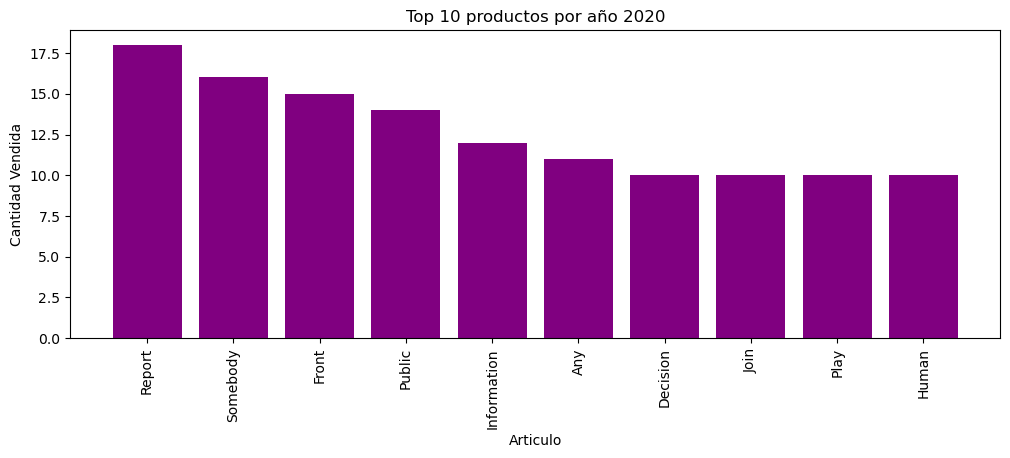

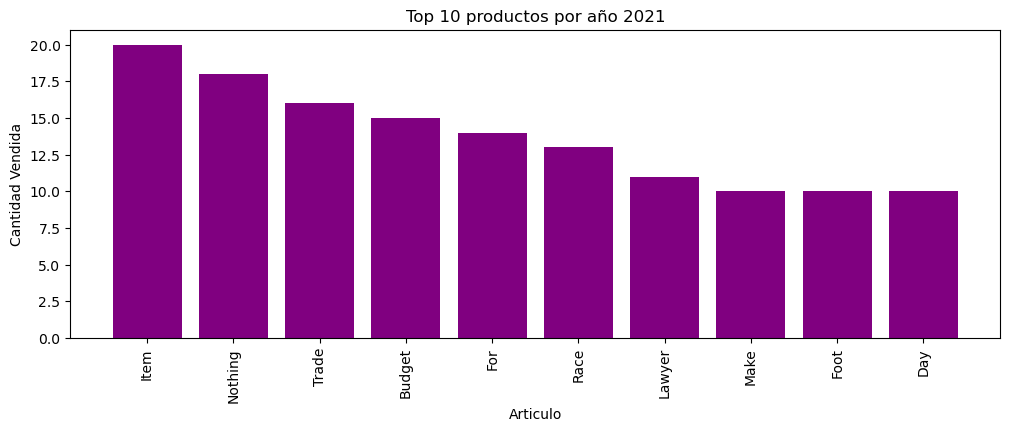

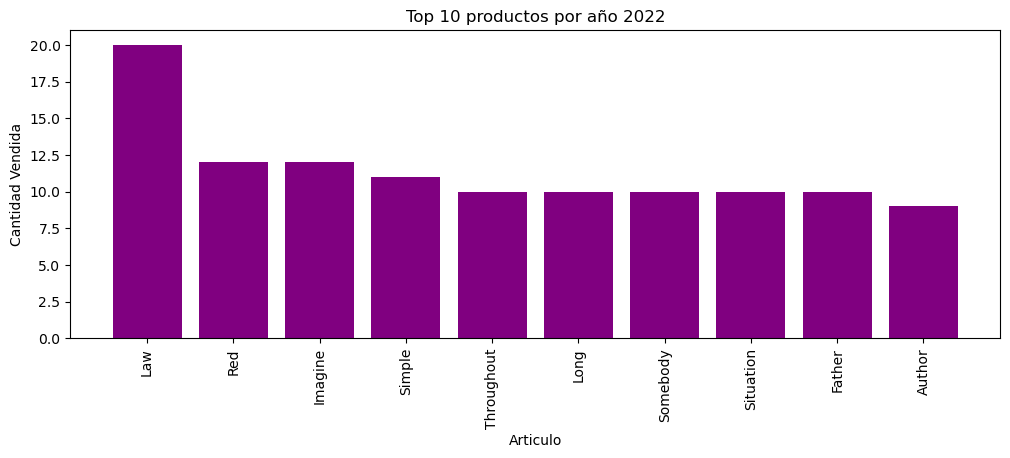

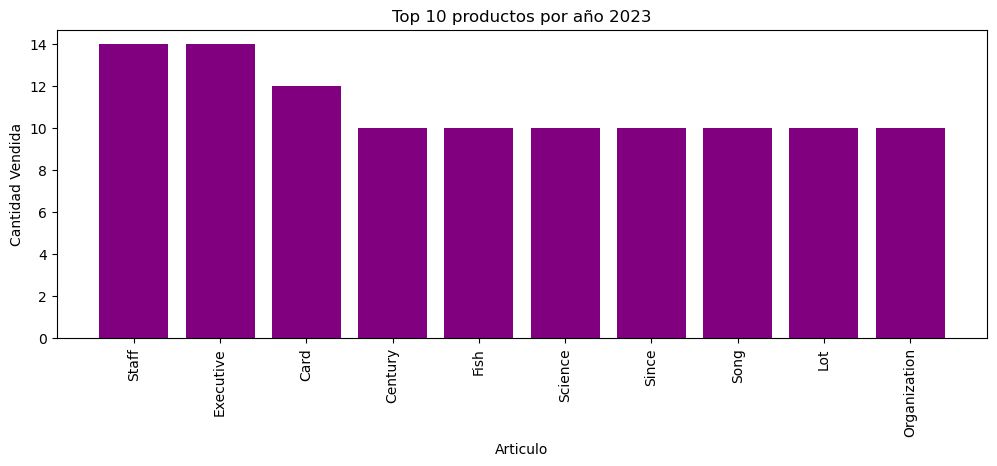

In [82]:
# con tabla hechos
# annual_sales_query = """
# SELECT 
#     anio AS year,
#     dA.nombre,
#     SUM(h.cantidad) AS total_quantity
# FROM hechos h
# JOIN dimArticulo dA ON h.idArticulo = dA.idarticulo
# JOIN dimFechas dF ON h.idFecha = dF.idFecha
# GROUP BY year, dA.nombre
# ORDER BY year, total_quantity DESC;
# """

annual_sales_query = """
SELECT 
    EXTRACT(YEAR FROM dV.fecha) AS year,
    dA.nombre,
    SUM(dV.cantidad) AS total_quantity
FROM dimVenta dV
JOIN dimArticulo dA ON dV.idarticulo = dA.idarticulo
GROUP BY year, dA.nombre
ORDER BY year, total_quantity DESC;
"""

annual_sales_df = get_data(pg_conn, annual_sales_query)

# top 10
top_10_annual = annual_sales_df.groupby('year').apply(lambda x: x.nlargest(10, 'total_quantity')).reset_index(drop=True)

# plot
for year in top_10_annual['year'].unique():
    plt.figure(figsize=(12, 4))
    subset = top_10_annual[top_10_annual['year'] == year]
    plt.bar(subset['nombre'], subset['total_quantity'], color='purple')
    plt.title(f'Top 10 productos por año {year}')
    plt.xlabel('Articulo')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=90)
    plt.show()

## 2. Clientes nuevos
### ¿Existe un cambio en que clientes nos compran, según distintos períodos??

In [15]:
# tabla de hechos
# clients_query = """
# SELECT 
#     dP.idpersona AS idPersona,
#     EXTRACT(YEAR FROM dV.fecha) AS year,
#     EXTRACT(MONTH FROM dV.fecha) AS month,
#     dV.fecha,
#     dV.cantidad,
#     dV.total
# FROM dimVenta dV
# JOIN dimPersona dP ON dV.idpersona = dP.idpersona
# WHERE dP.tipo_persona = 'Client';
# """

clients_query = """
SELECT 
    dP.idpersona AS idPersona,
    EXTRACT(YEAR FROM dV.fecha) AS year,
    EXTRACT(MONTH FROM dV.fecha) AS month,
    dV.fecha,
    dV.cantidad,
    dV.total
FROM dimVenta dV
JOIN dimPersona dP ON dV.idpersona = dP.idpersona;
"""

clients_df = get_data(pg_conn, clients_query)
clients_df

,idpersona,year,month,fecha,cantidad,total
0,117,2020,3,2020-03-13,7,1763.68
1,120,2022,6,2022-06-27,4,4722.22
2,120,2022,6,2022-06-27,10,4722.22
3,120,2021,1,2021-01-29,6,4288.33
4,122,2023,1,2023-01-12,7,1390.83
...,...,...,...,...,...,...
295,591,2023,6,2023-06-30,7,6526.86
296,595,2021,7,2021-07-14,4,371.77
297,597,2020,9,2020-09-09,9,5735.81
298,598,2022,9,2022-09-07,9,3225.41


In [22]:
clients_df['fecha'] = pd.to_datetime(clients_df['fecha'])

# fecha primera compra
clients_df['first_purchase'] = clients_df.groupby('idpersona')['fecha'].transform('min')
df_first_purchases = clients_df[clients_df['fecha'] == clients_df['first_purchase']]

# df de nuevos clientes
df_new_clients = df_first_purchases.sort_values(by=['idpersona']).drop_duplicates('idpersona')
df_new_clients['month_of_first_purchase'] = df_new_clients['first_purchase'].dt.month
df_new_clients['year_of_first_purchase'] = df_new_clients['first_purchase'].dt.year

# cantidad e ingresos por cliente
aggregated_data = clients_df.groupby(['idpersona', 'first_purchase']).agg(
    quantity_month=('cantidad', 'sum'),
    revenue_month=('total', 'sum')
).reset_index()

# agregar datos totales a df de clientes
df_new_clients = df_new_clients.merge(aggregated_data, on=['idpersona', 'first_purchase'], how='left')

# cantidad e ingresos por año
yearly_aggregates = clients_df.groupby(['idpersona', clients_df['fecha'].dt.year]).agg(
    quantity_year=('cantidad', 'sum'),
    revenue_year=('total', 'sum')
).reset_index()

# agregar totales por año a df de clientes
df_new_clients = df_new_clients.merge(
    yearly_aggregates, 
    left_on=['idpersona', 'year_of_first_purchase'], 
    right_on=['idpersona', 'fecha'], 
    how='left'
)

# renombrar
df_new_clients = df_new_clients[[
    'idpersona', 'first_purchase', 'month_of_first_purchase', 
    'year_of_first_purchase', 'quantity_month', 'quantity_year', 
    'revenue_month', 'revenue_year'
]].drop_duplicates(subset=['idpersona'])  # unique 

# ver tabla
print(df_new_clients.head())

   idpersona first_purchase  month_of_first_purchase  year_of_first_purchase  \
0        117     2020-03-13                        3                    2020   
1        120     2021-01-29                        1                    2021   
2        122     2023-01-12                        1                    2023   
3        123     2021-08-10                        8                    2021   
4        126     2020-09-28                        9                    2020   

   quantity_month  quantity_year revenue_month revenue_year  
0               7              7       1763.68      1763.68  
1              20              6      13732.77      4288.33  
2               7              7       1390.83      1390.83  
3               4              4       8553.72      8553.72  
4               4              1       8881.77      5688.64  


In [26]:
# agrupar por mes para graficos
monthly_data = df_new_clients.groupby(['year_of_first_purchase', 'month_of_first_purchase']).agg(
    new_clients=pd.NamedAgg(column='idpersona', aggfunc='nunique'),  
    total_quantity=pd.NamedAgg(column='quantity_month', aggfunc='sum'),  
    total_revenue=pd.NamedAgg(column='revenue_month', aggfunc='sum')  
).reset_index()

monthly_data['month_start_date'] = pd.to_datetime({
    'year': monthly_data['year_of_first_purchase'],
    'month': monthly_data['month_of_first_purchase'],
    'day': 1
})

# sort por fecha para graficar
monthly_data = monthly_data.sort_values('month_start_date')
monthly_data.head()

,year_of_first_purchase,month_of_first_purchase,new_clients,total_quantity,total_revenue,month_start_date
0,2020,1,7,59,79509.88,2020-01-01
1,2020,2,7,59,52332.89,2020-02-01
2,2020,3,8,80,55296.74,2020-03-01
3,2020,4,5,61,52674.43,2020-04-01
4,2020,5,2,30,16135.69,2020-05-01


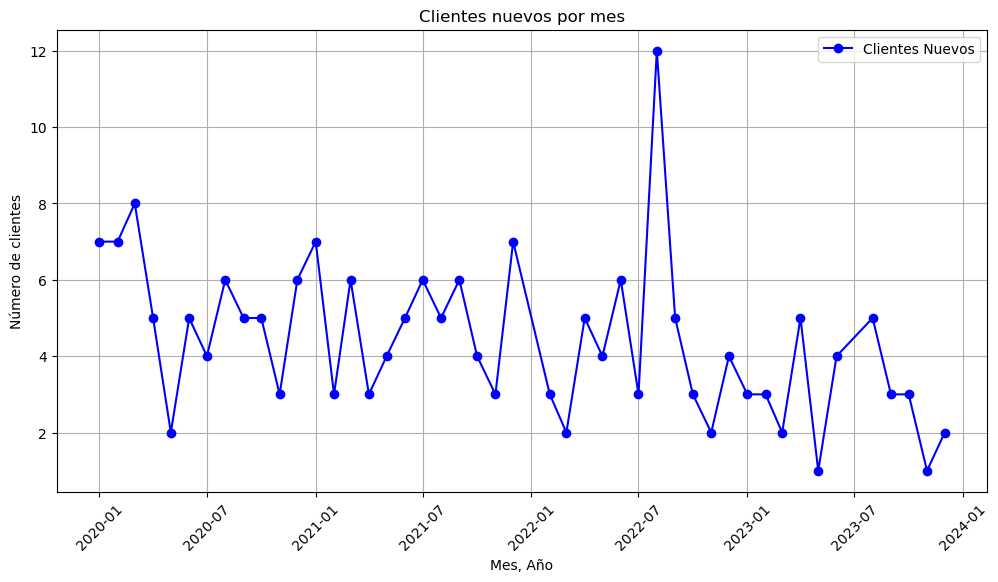

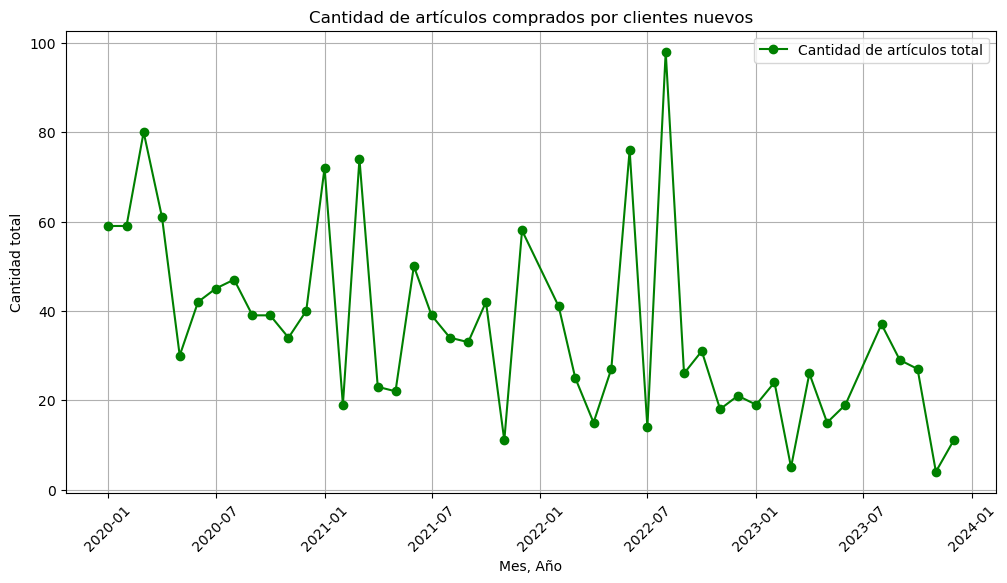

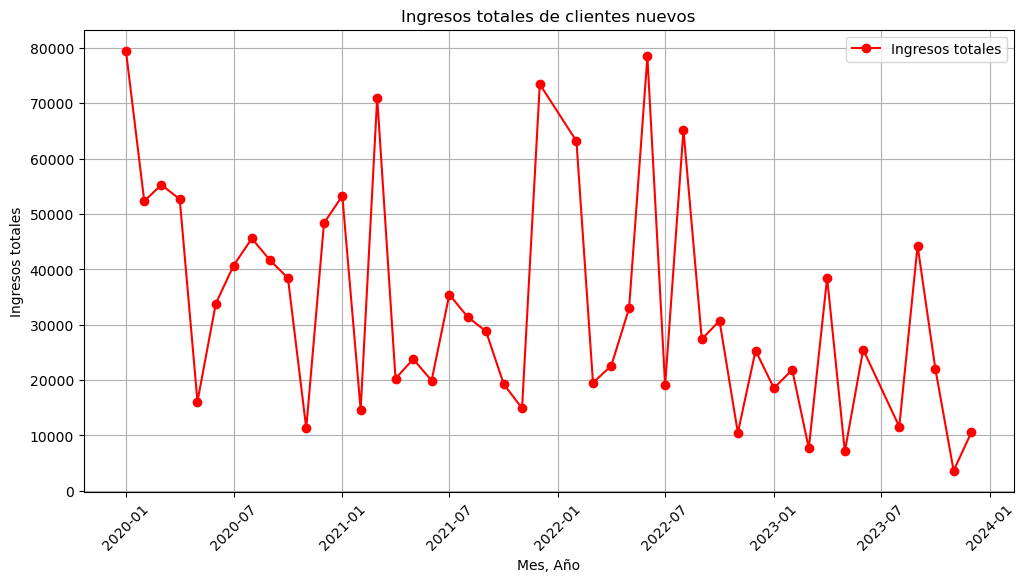

In [36]:
# Cantidad de clientes nuevos por mes
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['month_start_date'], monthly_data['new_clients'], marker='o', linestyle='-', color='blue', label='Clientes Nuevos')
plt.title('Clientes nuevos por mes')
plt.xlabel('Mes, Año')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Cantidad total de articulos comprados por los clientes nuevos
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['month_start_date'], monthly_data['total_quantity'], marker='o', linestyle='-', color='green', label='Cantidad de artículos total')
plt.title('Cantidad de artículos comprados por clientes nuevos')
plt.xlabel('Mes, Año')
plt.ylabel('Cantidad total')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# ingresos total
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['month_start_date'], monthly_data['total_revenue'], marker='o', linestyle='-', color='red', label='Ingresos totales')
plt.title('Ingresos totales de clientes nuevos')
plt.xlabel('Mes, Año')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

## 3. Estacionalidad de Ventas
### ¿En qué periodo del año se vende más y en qué periodo se vende menos?

In [30]:
# tabla hechos
# seasonality_query = """
# SELECT 
#     EXTRACT(YEAR FROM dF.fecha_completa) AS year,
#     EXTRACT(QUARTER FROM dF.fecha_completa) AS quarter,
#     EXTRACT(MONTH FROM dF.fecha_completa) AS month,
#     SUM(h.cantidad) AS total_quantity,
#     SUM(h.total) AS total_revenue
# FROM hechos h
# JOIN dimFechas dF ON h.idFecha = dF.idFecha
# GROUP BY year, quarter, month
# ORDER BY year, quarter, month;
# """

seasonality_query = """
SELECT 
    EXTRACT(YEAR FROM dV.fecha) AS year,
    EXTRACT(QUARTER FROM dV.fecha) AS quarter,
    EXTRACT(MONTH FROM dV.fecha) AS month,
    SUM(dV.cantidad) AS total_quantity,
    SUM(dV.total) AS total_revenue
FROM dimVenta dV
GROUP BY year, quarter, month
ORDER BY year, quarter, month;

"""

In [34]:
seasonality_df = get_data(pg_conn, seasonality_query)
seasonality_df.head()

,year,quarter,month,total_quantity,total_revenue
0,2020,1,1,42,55215.93
1,2020,1,2,39,30726.90
2,2020,1,3,78,49825.22
3,2020,2,4,38,27736.89
4,2020,2,5,20,12818.15


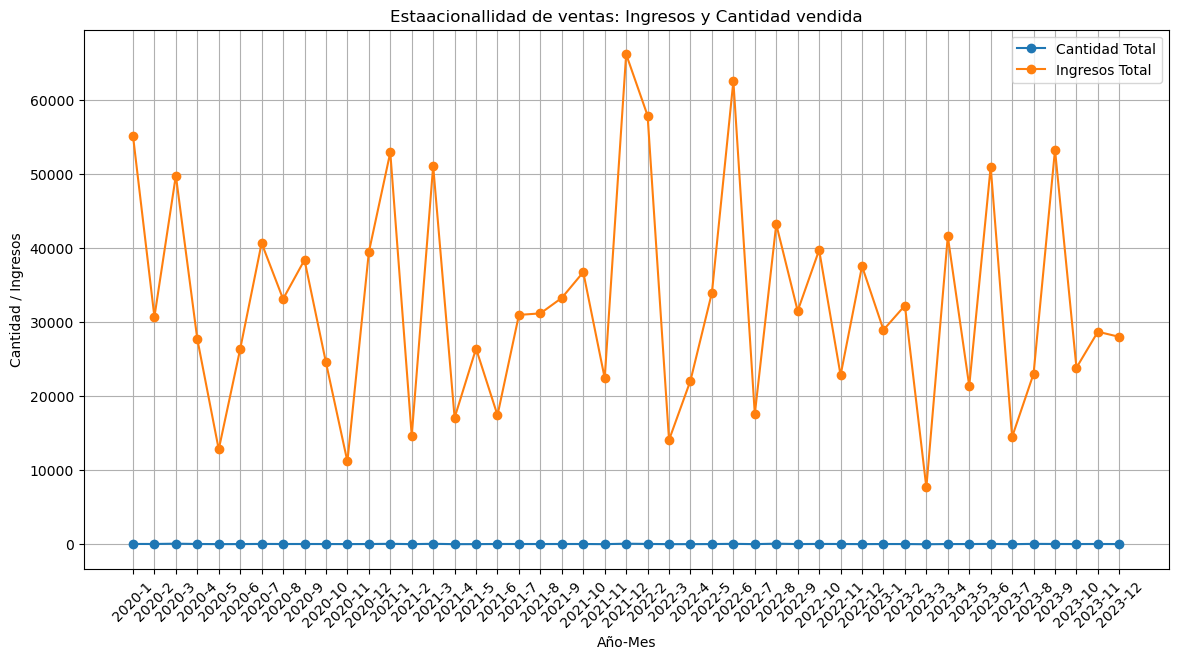

In [35]:
# un mismo eje para los dos, no se ve bien cantidad total
# plt.figure(figsize=(14, 7))
# plt.plot(seasonality_df['year'].astype(str) + '-' + seasonality_df['month'].astype(str), seasonality_df['total_quantity'], label='Cantidad Total', marker='o')
# plt.plot(seasonality_df['year'].astype(str) + '-' + seasonality_df['month'].astype(str), seasonality_df['total_revenue'], label='Ingresos Total', marker='o')
# plt.title('Estaacionallidad de ventas: Ingresos y Cantidad vendida')
# plt.xlabel('Año-Mes')
# plt.ylabel('Cantidad / Ingresos')
# plt.legend()
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()

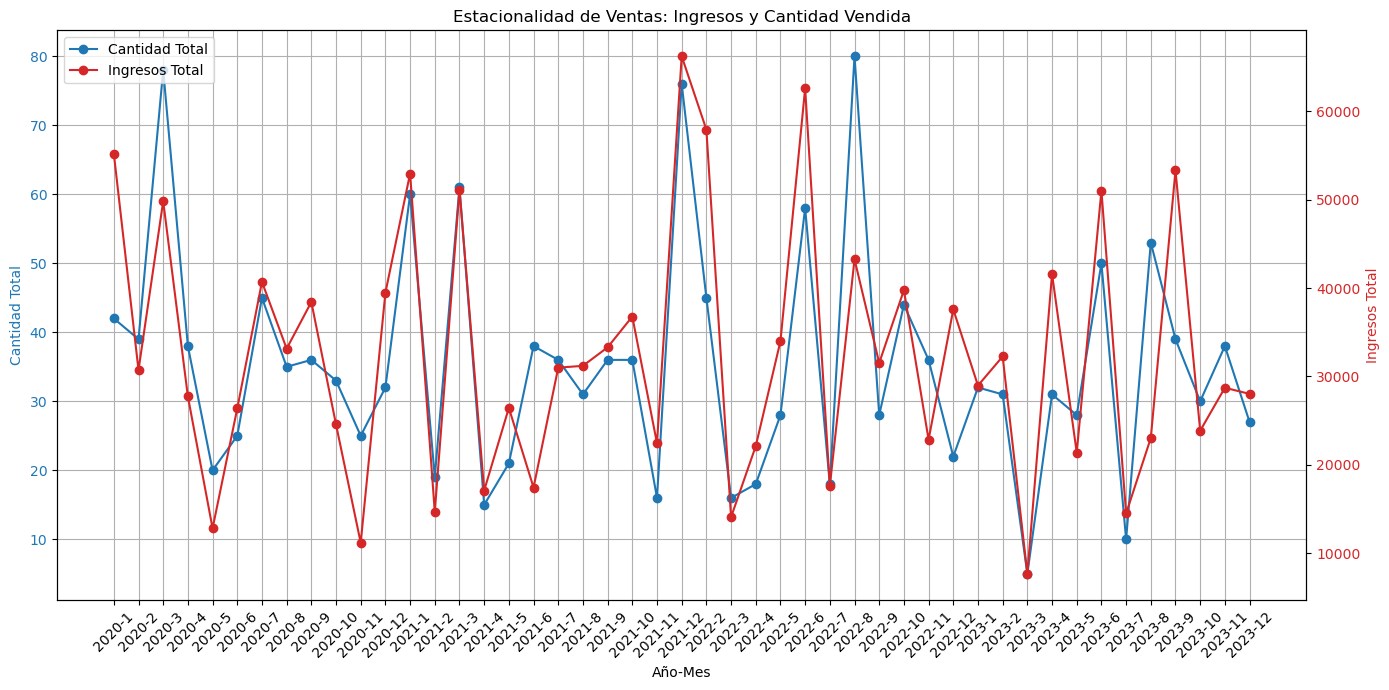

In [39]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# eje primario
color = 'tab:blue'
ax1.set_xlabel('Año-Mes')
ax1.set_ylabel('Cantidad Total', color=color)
ax1.plot(seasonality_df['year'].astype(str) + '-' + seasonality_df['month'].astype(str), 
         seasonality_df['total_quantity'], label='Cantidad Total', marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
x_ticks = seasonality_df['year'].astype(str) + '-' + seasonality_df['month'].astype(str)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks, rotation=45)

ax1.grid(True)

# eje secundario
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Ingresos Total', color=color)
ax2.plot(seasonality_df['year'].astype(str) + '-' + seasonality_df['month'].astype(str), 
         seasonality_df['total_revenue'], label='Ingresos Total', marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# titulo
plt.title('Estacionalidad de Ventas: Ingresos y Cantidad Vendida')
fig.tight_layout() 

# leyenda
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

## 4. Rentabilidad por producto
### ¿Cuál es el producto que genera más ganancia? ¿Y el que genera menos?

In [44]:
# tabla hechos
# profit_query = """
# SELECT 
#     dA.nombre,
#     SUM(h.ganancia) AS total_profit
# FROM hechos h
# JOIN dimArticulo dA ON h.idArticulo = dA.idarticulo
# GROUP BY dA.nombre
# ORDER BY total_profit DESC
# LIMIT 20;
# """

profit_query = """
SELECT 
    dV.idarticulo,
    dA.nombre,
    dV.cantidad,
    dV.precio,
    dV.descuento,
    EXTRACT(YEAR FROM dV.fecha) AS year,
    EXTRACT(MONTH FROM dV.fecha) AS month
FROM dimVenta dV
JOIN dimArticulo dA ON dV.idarticulo = dA.idarticulo;
"""

profit_df = get_data(pg_conn, profit_query)
profit_df.head()

,idarticulo,nombre,cantidad,precio,descuento,year,month
0,112,Could,5,460.26,111.01,2022,2
1,255,Ahead,2,101.38,8.74,2022,6
2,138,Item,10,179.30,11.66,2021,10
3,120,Left,10,182.21,40.05,2020,4
4,18,Surface,3,406.11,66.30,2022,11


In [46]:
profit_df['precio'] = profit_df['precio'].astype(float)
profit_df['descuento'] = profit_df['descuento'].astype(float)
profit_df['year'] = profit_df['year'].astype(int)
profit_df['month'] = profit_df['month'].astype(int)
profit_df['profit'] = profit_df['cantidad'] * profit_df['precio'] - profit_df['descuento']

print(profit_df.dtypes)

idarticulo      int64
nombre         object
cantidad        int64
precio        float64
descuento     float64
year            int32
month           int32
profit        float64
dtype: object


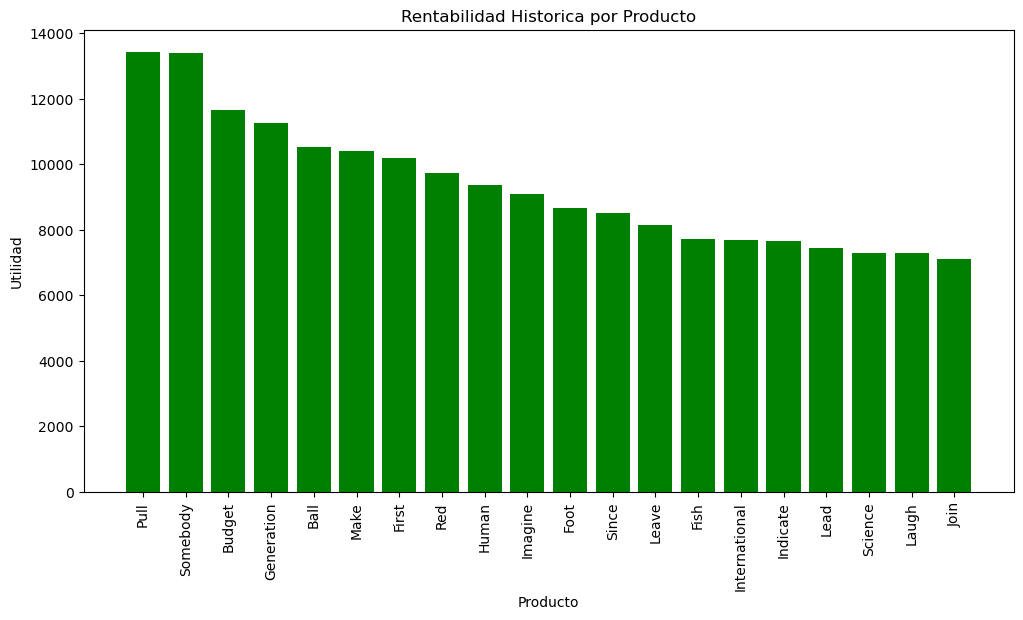

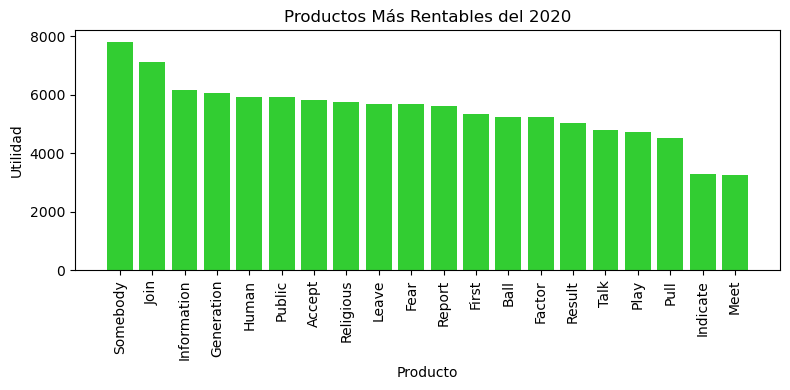

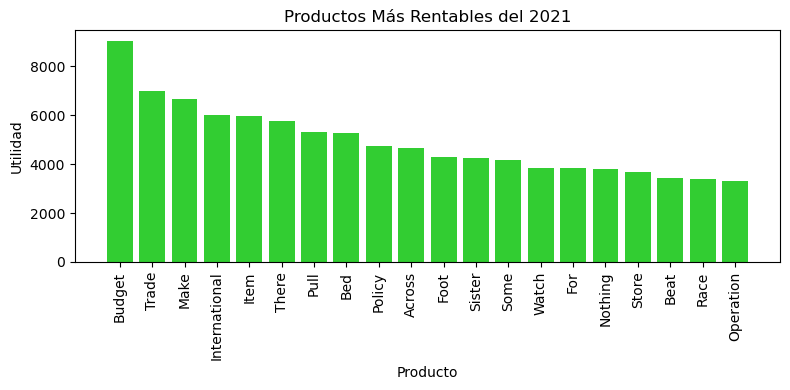

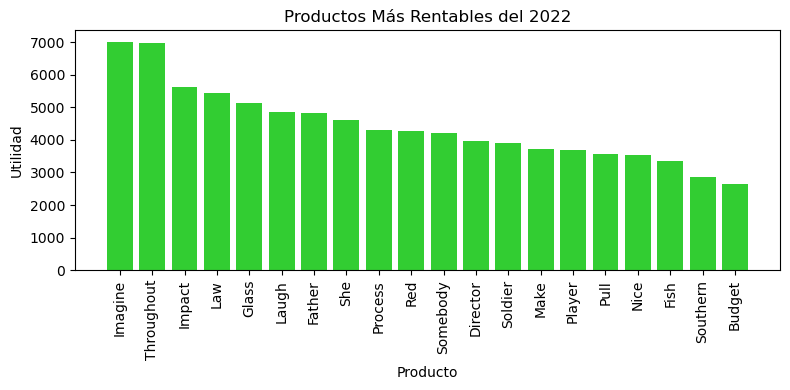

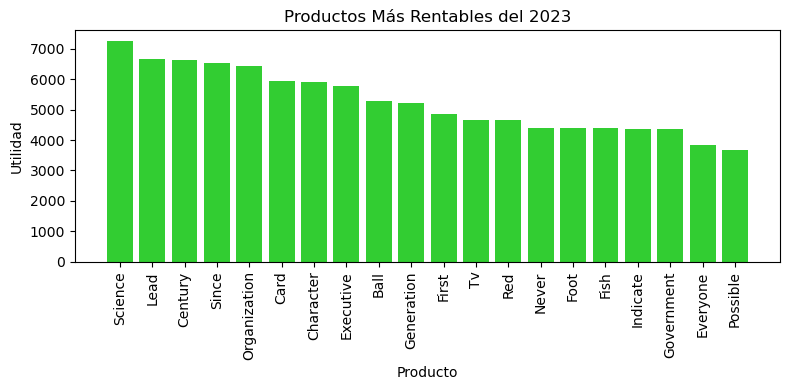

In [52]:
product_profit = profit_df.groupby(['nombre', 'year', 'month']).agg(total_profit=('profit', 'sum')).reset_index()
product_profit_year = profit_df.groupby(['nombre', 'year']).agg(total_profit=('profit', 'sum')).reset_index()

# top 20 productos
top_20_products = product_profit.groupby('nombre').agg(total_profit=('total_profit', 'sum')).nlargest(20, 'total_profit')

# grafica top 20 historico
plt.figure(figsize=(12, 6))
plt.bar(top_20_products.index, top_20_products['total_profit'], color='green')
plt.title('Rentabilidad Historica por Producto')
plt.xlabel('Producto')
plt.ylabel('Utilidad')
plt.xticks(rotation=90)
plt.show()

# grafica por año
unique_years = product_profit_year['year'].unique()

for year in unique_years:
    # top 20 productos por año
    yearly_data = product_profit_year[product_profit_year['year'] == year]
    top_20_products_year = yearly_data.nlargest(20, 'total_profit')

    # grafico por año
    plt.figure(figsize=(8, 4))
    plt.bar(top_20_products_year['nombre'], top_20_products_year['total_profit'], color='limegreen')
    plt.title(f'Productos Más Rentables del {year}')
    plt.xlabel('Producto')
    plt.ylabel('Utilidad')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## 5. Rentabilidad por categorías
### Existe alguna relación entre la categoría y la rentabilidad?

In [57]:
# tabla de hechos
# category_query = """
# SELECT 
#     dA.categoria,
#     SUM(h.ganancia) AS total_profit,
#     SUM(h.total) AS total_sales
# FROM hechos h
# JOIN dimArticulo dA ON h.idArticulo = dA.idarticulo
# GROUP BY dA.categoria
# ORDER BY total_profit DESC
# LIMIT 10;
# """

category_query = """
SELECT 
    dA.categoria,
    dV.cantidad,
    dV.precio,
    dV.descuento,
    EXTRACT(YEAR FROM dV.fecha) AS year
FROM dimVenta dV
JOIN dimArticulo dA ON dV.idarticulo = dA.idarticulo;
"""

category_profit_df = get_data(pg_conn, category_query)
category_profit_df.head()

,categoria,cantidad,precio,descuento,year
0,Industrial,5,460.26,111.01,2022
1,Sports,2,101.38,8.74,2022
2,Beauty,10,179.30,11.66,2021
3,Tools,10,182.21,40.05,2020
4,Home,3,406.11,66.30,2022


In [58]:
category_profit_df['precio'] = category_profit_df['precio'].astype(float)
category_profit_df['descuento'] = category_profit_df['descuento'].astype(float)
category_profit_df['year'] = category_profit_df['year'].astype(int)
category_profit_df['profit'] = category_profit_df['cantidad'] * category_profit_df['precio'] - category_profit_df['descuento']

print(category_profit_df.dtypes)

categoria     object
cantidad       int64
precio       float64
descuento    float64
year           int32
profit       float64
dtype: object


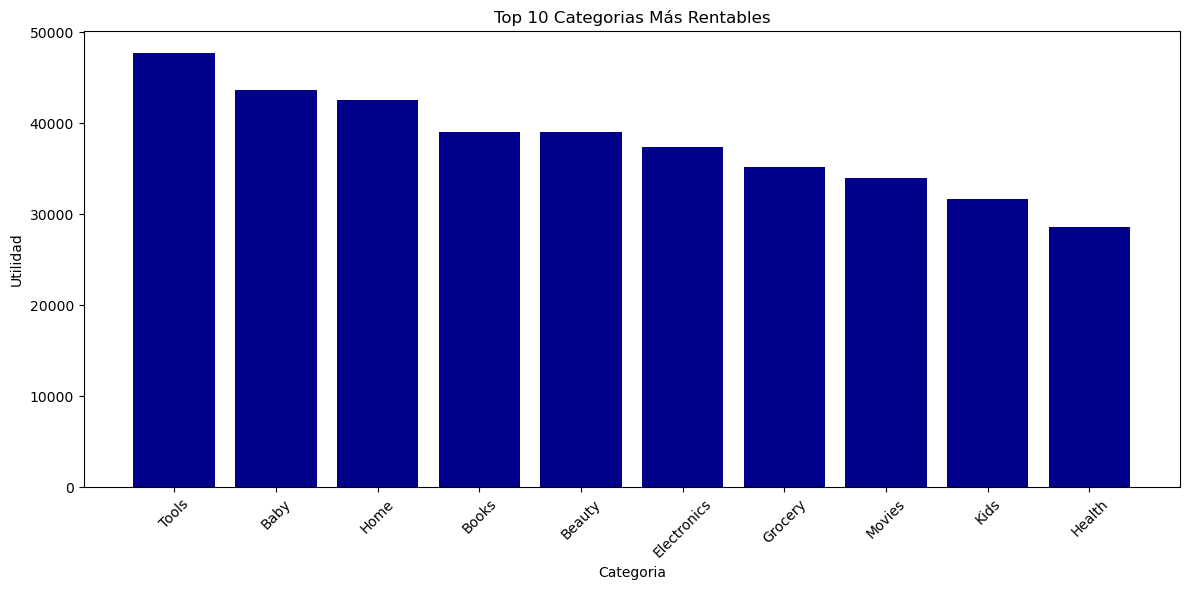

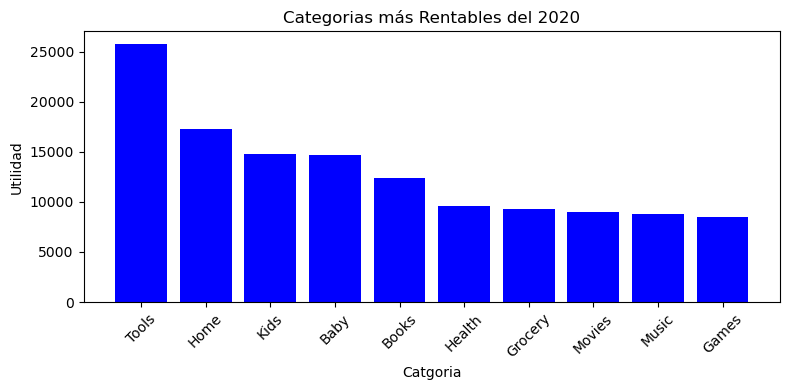

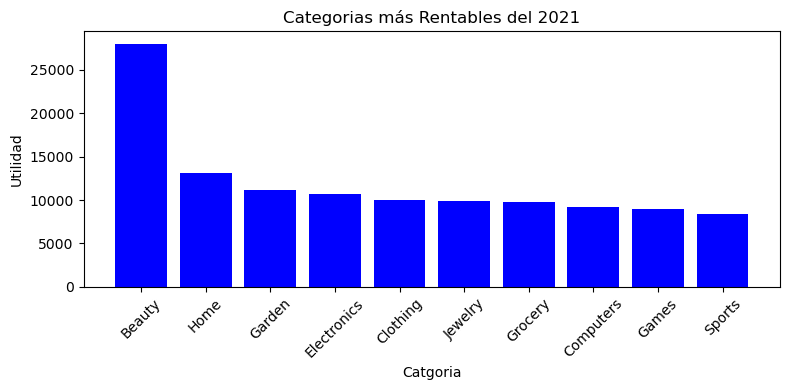

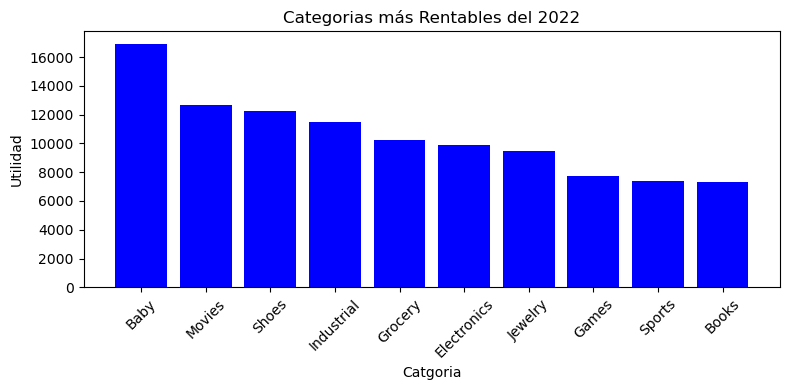

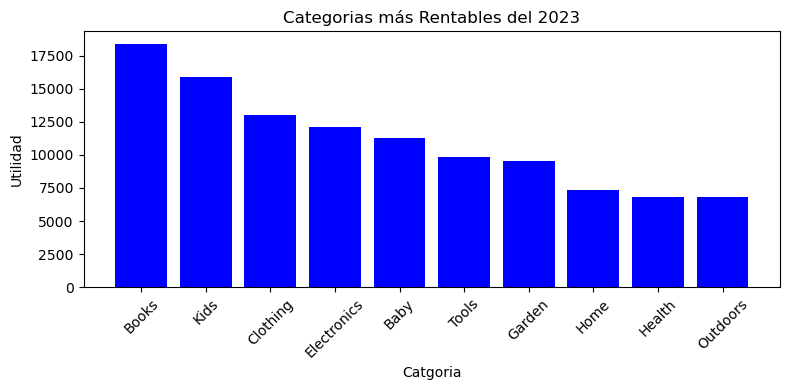

In [64]:
# top 10 categorias
total_category_profit = category_profit_df.groupby('categoria').agg(total_profit=('profit', 'sum')).reset_index()
top_10_categories_overall = total_category_profit.nlargest(10, 'total_profit')

#grafica
plt.figure(figsize=(12, 6))
plt.bar(top_10_categories_overall['categoria'], top_10_categories_overall['total_profit'], color='darkblue')
plt.title('Top 10 Categorias Más Rentables')
plt.xlabel('Categoria')
plt.ylabel('Utilidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# top categorias por añp
category_profit_year = category_profit_df.groupby(['categoria', 'year']).agg(total_profit=('profit', 'sum')).reset_index()

unique_years = category_profit_year['year'].unique()
for year in unique_years:
    #top 10 categorias 
    yearly_data = category_profit_year[category_profit_year['year'] == year]
    top_10_categories = yearly_data.nlargest(10, 'total_profit')

    # grafico 
    plt.figure(figsize=(8, 4))
    plt.bar(top_10_categories['categoria'], top_10_categories['total_profit'], color='blue')
    plt.title(f'Categorias más Rentables del {year}')
    plt.xlabel('Catgoria')
    plt.ylabel('Utilidad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()